In [251]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

plt.rc('axes', titlesize=16)

df = pd.read_csv('5mb-download-cable.csv')
df['network'] = 'Cabo'
df['mode'] = 'Download'

df2 = pd.read_csv('5mb-download-wifi.csv')
df2['network'] = 'Wifi'
df2['mode'] = 'Download'

df3 = pd.read_csv('5mb-upload-cable.csv')
df3['network'] = 'Cabo'
df3['mode'] = 'Upload'

df4 = pd.read_csv('5mb-upload-wifi.csv')
df4['network'] = 'Wifi'
df4['mode'] = 'Upload'

def energy (time, power):
    return power * (time / 1000 / 3600);

for d in [df, df2, df3, df4]:
    time = d.time.max()
    d['energy'] = d.apply(lambda row: energy(time, row.power), axis=1)


In [252]:
master = pd.concat([df, df2, df3, df4])

Text(0.5,0,'Conexão de rede')

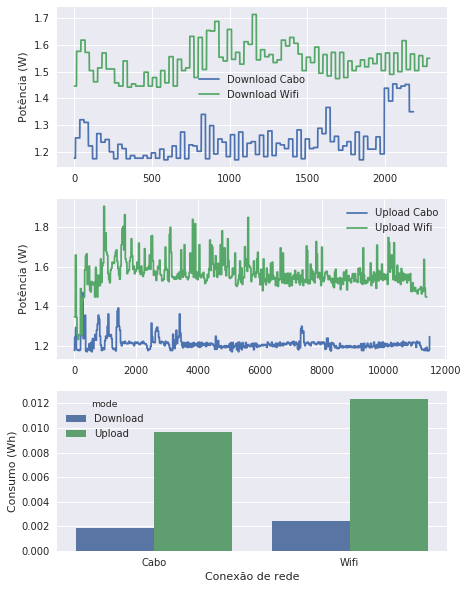

In [283]:
fig = plt.figure(figsize=(7, 10))

ax0 = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)

labels = ['Download Cabo', 'Download Wifi', 'Upload Cabo', 'Upload Wifi']

df.power.plot(ax=ax0)
df2.power.plot(ax=ax0)
ax0.set_ylabel('Potência (W)')
ax0.legend(labels[:2], loc='best')

df3.power.plot(ax=ax1)
df4.power.plot(ax=ax1)

# plot = sns.kdeplot (df.energy, ax=ax1)
# plot = sns.kdeplot (df2.energy, ax=ax1)
# plot = sns.kdeplot (df3.energy, ax=ax1)
# plot = sns.kdeplot (df4.energy, ax=ax1)
ax1.set_ylabel('Potência (W)')
ax1.legend(labels[2:], loc='best')


# plot.legend_.texts[0].set_text('Download Cabo')
# plot.legend_.texts[1].set_text('Upload Cabo')
# plot.legend_.texts[2].set_text('Download Wifi')
# plot.legend_.texts[3].set_text('Upload Wifi')

plot1 = sns.barplot (x='network', y='energy', hue='mode', data=master, ax=ax2)

plot1.set_ylabel('Consumo (Wh)')
plot1.set_xlabel('Conexão de rede')



In [256]:
master.mean()

power         1.389655
time      12331.983519
energy        0.009564
dtype: float64

In [26]:
res.add(df2.power.mean() * df2.time.max() / 1000 / 3600)

0.0024041060451237264

In [27]:
res.add(df3.power.mean() * df3.time.max() / 1000 / 3600)

0.0096528625790542506

In [30]:
res.add(df4.power.mean() * df4.time.max() / 1000 / 3600)

""


In [33]:
res.head()
# sns.violinplot(df.current)
# sns.kdeplot(df.power, df.current, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

""


Text(0,0.5,'Potência (W)')

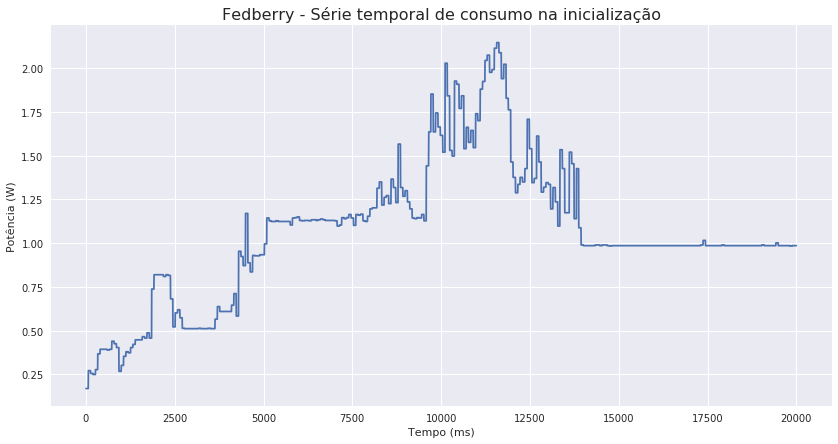

In [4]:

plot = df.set_index('time').power.plot(title='Fedberry - Série temporal de consumo na inicialização', figsize=(14,7))
plot.set_xlabel('Tempo (ms)')
plot.set_ylabel('Potência (W)')

In [17]:
df.head()

,power,current,time
0,0.118,22.6,5
1,0.118,22.6,10
2,0.118,22.6,15
3,0.118,22.6,19
4,0.118,22.6,24


In [5]:
df.mean()

Unnamed: 0    1948.000000
power            1.055675
current        211.935455
time          9964.421093
dtype: float64

In [6]:
df = pd.read_csv('fedberry-boot-network.csv')

In [7]:
df.mean()

power         1.162305
current     228.348529
time       9959.224448
dtype: float64

In [8]:
df = pd.read_csv('fedberry-boot-wifi.csv')

In [9]:
df.mean()

power         1.279749
current     249.665142
time       9959.375193
dtype: float64

In [11]:
df = pd.read_csv('fedberry-boot-real.csv')

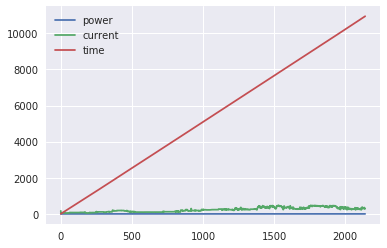

In [12]:
df.plot()

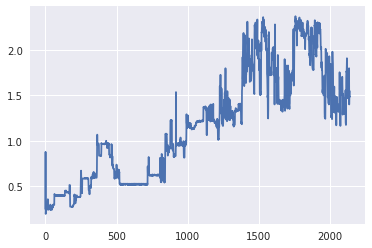

In [13]:
df.power.plot()

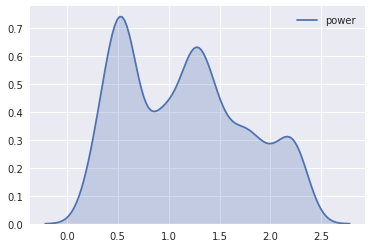

In [15]:
sns.kdeplot(df.power, shade=True)

In [16]:
df.mean()

power         1.159371
current     227.583178
time       5453.805231
dtype: float64

In [112]:
df3 = pd.read_csv('raspistill_default.csv')

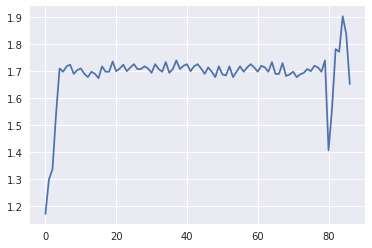

In [113]:
df3.set_index('time')
df3.power.plot()

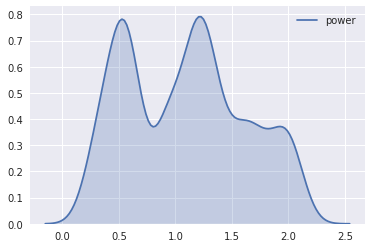

In [20]:
sns.kdeplot(df3.power, shade=True)

In [21]:
df3.mean()

power         1.093296
current     213.711497
time       5625.152174
dtype: float64

In [196]:
datasets = []

def energy (time, power):
    return power * (time / 1000 / 3600);

for algo in ['aes', 'aes256', '2fish']:
    for size in [1, 10, 25, 50, 100]:
        data = pd.read_csv('gpg-' + str(size) + 'mb-' + algo + '.csv')
        time = data.max().time
        
        data['sizet'] = size
        data['algo'] = algo
        data['energy'] = data.apply(lambda row: energy(time, row.power), axis=1)
        datasets.append(data)

In [197]:
frame = pd.concat(datasets)


In [198]:
frame.head()





,power,time,sizet,algo,energy
0,1.192,4,1,aes,0.000126
1,1.340,52,1,aes,0.000142
2,1.410,118,1,aes,0.000150
3,1.520,183,1,aes,0.000161
4,1.528,249,1,aes,0.000162


Text(0,0.5,'Consumo de energia (Wh)')

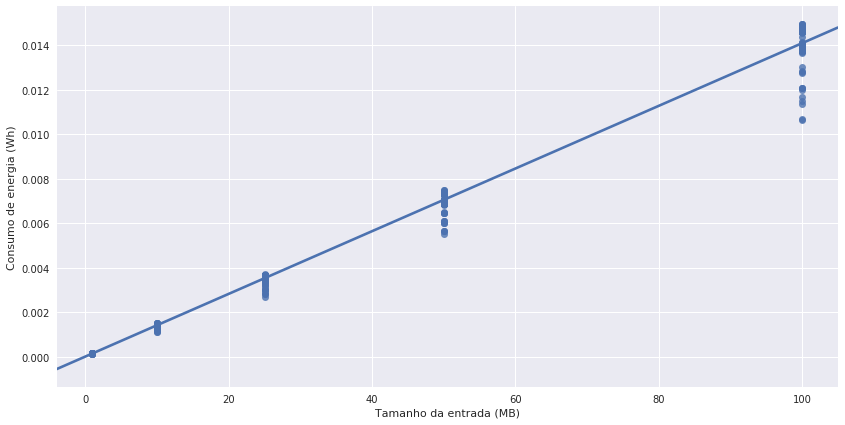

In [199]:
plt.figure(figsize=(14, 7))
# plot = sns.barplot(x='size', y='energy', hue='algo', data=frame)
plot = sns.regplot(x='sizet', y='energy', data=frame)
# plot.legend_.set_title('Tamanho (MB)')
plot.set_xlabel('Tamanho da entrada (MB)')
plot.set_ylabel('Consumo de energia (Wh)')

Text(0.5,0,'Potência (W)')

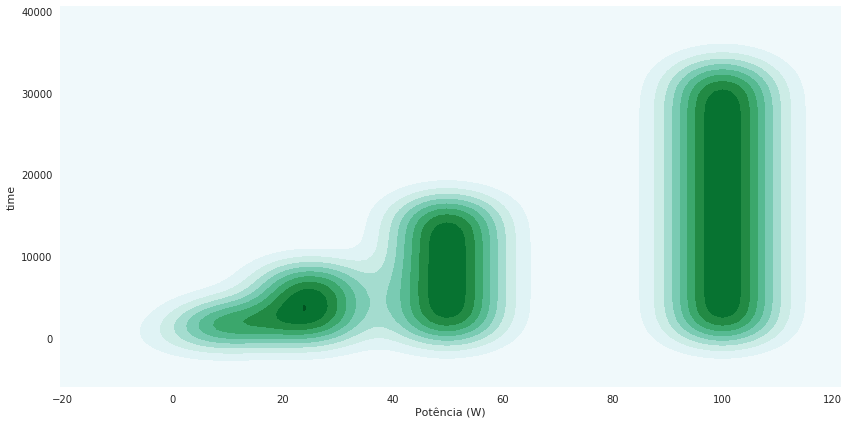

In [203]:
plt.figure(figsize=(14, 7))
plot = sns.kdeplot(frame.sizet, frame.time, shade=True)
plot.set_xlabel('Potência (W)')
# plot.legend_.set_visible(False)

In [195]:
frame.size

14200